<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/irina_BankMkt_EDA_detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Marketing Bank Dataset EDA

#### The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

#### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

#### Available at:

[pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001\n",
        
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt"

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
from operator import itemgetter 
import warnings
from pandas._libs import index
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
# from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
# from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import GradientBoostingClassifier  

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

Mounting Google Drive to Colab Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading data


###Input variables:

* bank client data 

  1. age (numeric)
  2. job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed','services','student', 'technician', 'unemployed', 'unknown')
  3. marital : marital status (categorical: 'divorced', 'married', 'single','unknown'; note: 'divorced' means divorced or widowed)
  4. education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
  5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
  6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
  7. loan: has personal loan? (categorical: 'no','yes','unknown')

* related with the last contact of the current campaign
  8. contact: contact communication type (categorical: 'cellular', 'telephone') 
  9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
  10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
  11. duration: last contact duration, in seconds (numeric)  
### Note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). The duration is not known before a call is performed. Also, after the end of the call, y IS known. Thus, this input should only be included for benchmark purposes and discarded if the intention is to have a realistic predictive model.

* other attributes  
  12. campaign: number of contacts performed during this campaign and for this client (numeric: includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric: 999 means client was not previously contacted) 
  14. previous: number of contacts performed before this campaign and for this client (numeric) 
  15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

* social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month-rate - daily indicator (numeric: computed by the European Central Bank (ECB) and published by Thomson Reuters, i.e., a publicly available and widely used index)
  20. nr.employed: number of employees - quarterly indicator (numeric)

* Output variable (desired target):
  21. y: has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

# data = pd.read_csv('/content/drive/MyDrive/bank.csv')

In [ ]:
# data_Dictionary = pd.read_excel('....')
# data_Dictionary

In [ ]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,56,57,37,40,56,45,59,41,24,25,41,25,29,57,35
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,blue-collar,services,blue-collar,housemaid,blue-collar
marital,married,married,married,married,married,married,married,married,single,single,married,single,single,divorced,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,unknown,high.school,high.school,basic.4y,basic.6y
default,no,unknown,no,no,no,unknown,no,unknown,no,no,unknown,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,no,yes,no,yes,yes
loan,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may,may,may,may,may,may,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print('Shape of dataframe:', data.shape)

Shape of dataframe: (41188, 21)


* 41,188 observations in the dataset, with no missing values. 
* Each observation represents an existing customer that the bank reached via phone calls.
* For each observation, the dataset records 21 input variables that stand for both qualitative and quantitative attributes

In [ ]:
# displaying the data types and store into a variable
dt = data.dtypes
dt

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# describing numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
# counting categorical variables
print(data['job'].value_counts())
print('\n')
print(data['marital'].value_counts())
print('\n')
print(data['education'].value_counts())
print('\n')
print(data['default'].value_counts())
print('\n')
print(data['housing'].value_counts())
print('\n')
print(data['loan'].value_counts())
print('\n')
print(data['contact'].value_counts())
print('\n')
print(data['month'].value_counts())
print('\n')
print(data['day_of_week'].value_counts())
print('\n')
print(data['poutcome'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


no         32588
unknown     8597
yes            3
Name: default, dtype: int64


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


cellular     26144
telephone    15044
Name: contact, dtype: int64


may    13769
jul     717

In [ ]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
new_data = pd.read_csv(url, sep=';', na_values = missing_values)

print(new_data.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [ ]:
TARGET = 'y'

In [ ]:
objList = []
intList = []
floatList = []

for i in dt.index:
    if i in ([TARGET]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['int64']) : intList.append(i)
    if dt[i] in (['float64']) : floatList.append(i)
        
print('OBJECTS')
print('-------')
for i in objList:
    print(i)
print('\n')

print('INTEGERS')
print('--------')
for i in intList:
    print(i)
print('\n')

print('FLOATS')
print('------')
for i in floatList:
  print(i)

OBJECTS
-------
job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


INTEGERS
--------
age
duration
campaign
pdays
previous


FLOATS
------
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


In [ ]:
for col in objList:
    print(col)
    print(data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']


In [ ]:
for col in intList:
    print(col)
    print(data[col].unique())

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]


In [ ]:
for col in floatList:
    print(col)
    print(data[col].unique())

emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.42

In [ ]:
# counting categorical variables
print(data['job'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


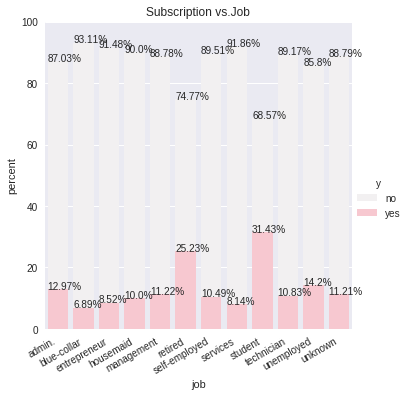

In [ ]:
x, y =  'job', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, dodge=False, color='pink').set(title = 'Subscription vs.Job')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')


for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* the bank contacted the most admin, blue-collor, technician 

 - admin.           10422
 - blue-collar       9254
 - technician        6743


* the bank contacted the least unemployed, student, unknown 

 - unemployed        1014
 - student            875
 - unknown            330

* from the most contacted groups, the percentages of subscribers are: 

 - admin.           12.97%
 - blue-collar       6.89%
 - technician       10.83%

* from the least contacted groups,the percentages of subscribers are:

 - unemployed        14.2%
 - student           31.43% 
 - unknown           11.21%





In [ ]:
print(data['education'].value_counts())

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


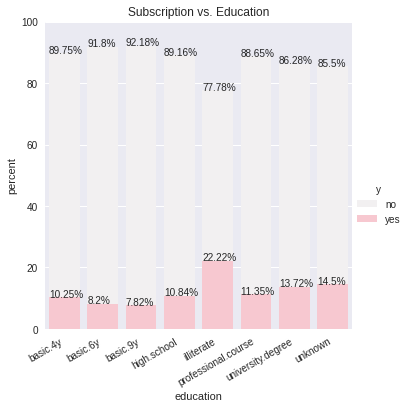

In [ ]:
x, y =  'education', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, dodge=False, color='pink').set(title = 'Subscription vs. Education')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* the bank contacted the most university degree, highschool, basic 9 years of school:

 - university.degree      12168
 - high.school             9515
 - basic.9y                6045

* the bank contacted the least basic 6 years of school, unknown, illiterate:
 - basic.6y                2292
 - unknown                 1731
 - illiterate                18


* from the most contacted groups, the percentages of subscribers are:
 - university.degree      13.72%
 - high.school            10.84%
 - basic.9y                7.82%

* from the least contacted groups,the percentages of subscribers are:
 - basic.6y                8.2% 
 - unknown                14.50%
 - illiterate             22.22%

In [ ]:
print(data['marital'].value_counts())


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


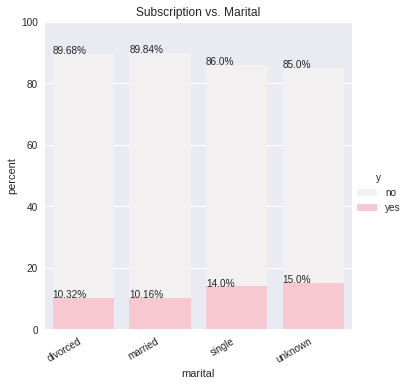

In [ ]:
x, y =  'marital', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, dodge=False, color='pink').set(title = 'Subscription vs. Marital')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* based on the marital status:
 - married     24928
 - single      11568
 - divorced     4612
 - unknown        80

* the percentages of subscribers based on the marital status:
 - married   10.16%
 - single    14.00%
 - divorced  10.32%
 - unknown   15.00%

* the clients mostly contacted by the bank are married and single



In [ ]:
print(data['default'].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


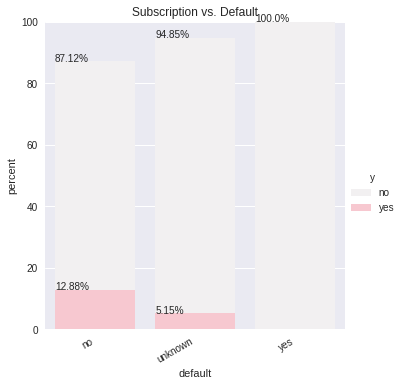

In [ ]:
x, y =  'default', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent', dodge = False, hue=y,data=df1,kind='bar', color='pink').set(title = 'Subscription vs. Default')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
 

* based on the credit default:

 - no         32588
 - unknown     8597
 - yes            3

* the percentages of subscribers on the default credit status:

 - no         12.88%
 - unknown     5.15%
 - yes            0%

In [ ]:
print(data['housing'].value_counts())

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


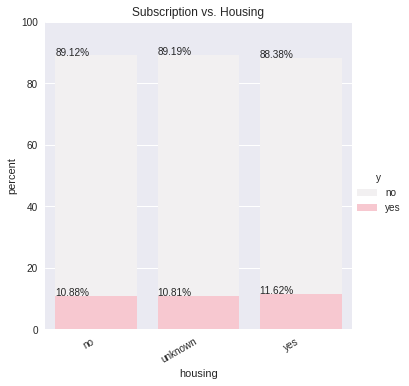

In [ ]:
x, y =  'housing', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent', dodge = False, hue=y,data=df1,kind='bar', color='pink').set(title = 'Subscription vs. Housing')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* based on the housing status:

 - yes        21576
 - no         18622
 - unknown      990

* the percentages of subscribers on the housing status:

 - yes        11.62%
 - no         10.88%
 - unknown    10.81%

In [ ]:
print(data['loan'].value_counts())

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


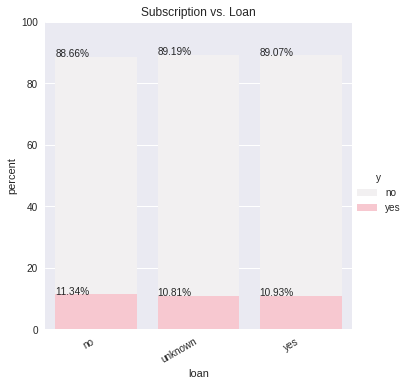

In [ ]:
x, y =  'loan', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent', dodge = False, hue=y,data=df1,kind='bar', color='pink').set(title = 'Subscription vs. Loan')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* based on the loan status:
 - no         33950
 - yes         6248
 - unknown      990

* the percentages of subscribers on the loan status:

 - no        11.34%
 - yes       10.93%
 - unknown   10.81%


In [ ]:
print(data['contact'].value_counts())

cellular     26144
telephone    15044
Name: contact, dtype: int64


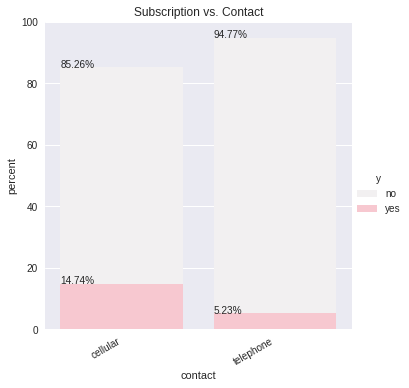

In [ ]:
x, y =  'contact', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent', dodge = False, hue=y,data=df1,kind='bar', color='pink').set(title = 'Subscription vs. Contact')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


* based on the contact:
 - cellular     26144
 - telephone    15044

* the percentages of subscribers based on the bank conntact:
 - cellular      14.74%
 - telephone      5.23%



In [ ]:
print(data['month'].value_counts())

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


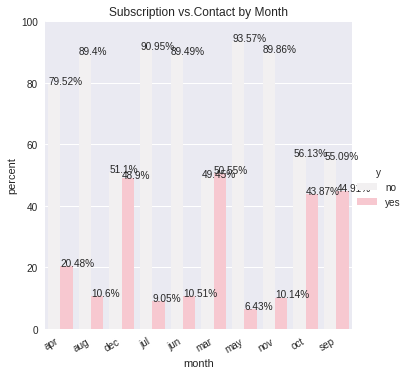

In [ ]:
x, y =  'month', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, color='pink').set(title = 'Subscription vs.Contact by Month')
g.ax.set_ylim(0, 100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)   

* based on the month of contact (top three)
 - may    13769
 - jul     7174
 - aug     6178


* based on the month of contact (bottom three)
 - sep      570
 - mar      546
 - dec      182

* the percentages of subscribers based on the bank month of contact (top three *from above list*):
 - may     6.43%
 - jul     9.05%
 - aug     10.6%

* the percentages of subscribers based on the bank month of contact (bottom three *from above list*):
 - sept    44.9%
 - mar     45.00%
 - dec     48.90% 

In [ ]:
print(data['day_of_week'].value_counts())

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


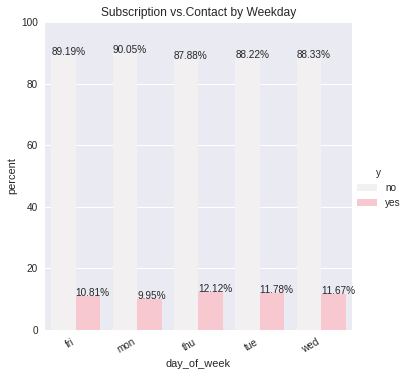

In [ ]:
x, y =  'day_of_week', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, color='pink').set(title = 'Subscription vs.Contact by Weekday')
g.ax.set_ylim(0, 100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)  

* based on the weekday contacted:

 - thu    8623
 - mon    8514
 - wed    8134
 - tue    8090
 - fri    7827


* the percentages of subscribers based on the weekday contacted:

 - thu    12.12%
 - mon     9.95%
 - wed    11.67%
 - tue    11.78%
 - fri    10.81%


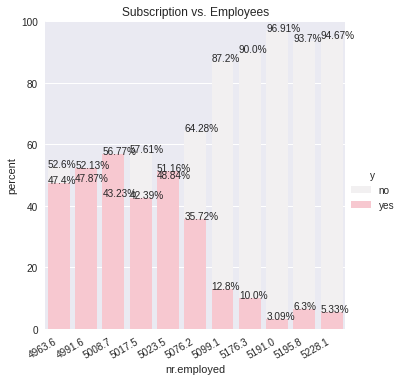

In [ ]:
x, y =  'nr.employed', 'y'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent', dodge = False, hue=y,data=df1,kind='bar', color='pink').set(title = 'Subscription vs. Employees')
g.ax.set_ylim(0,100)
g.set_xticklabels(rotation=30, ha = 'right')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

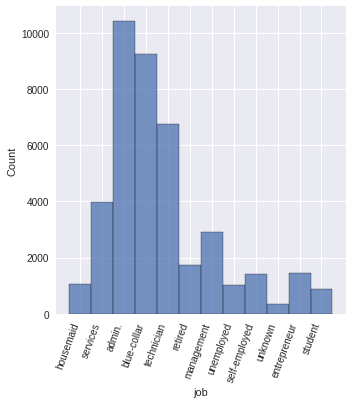

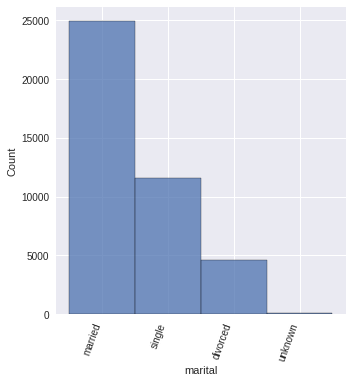

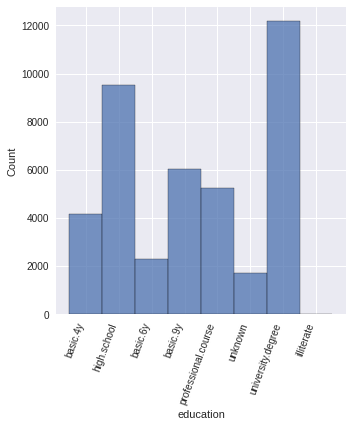

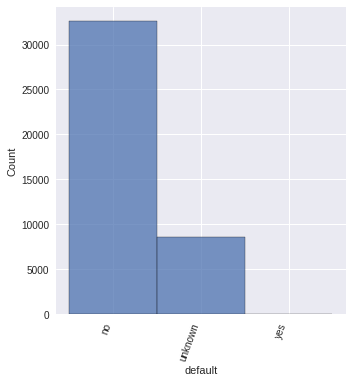

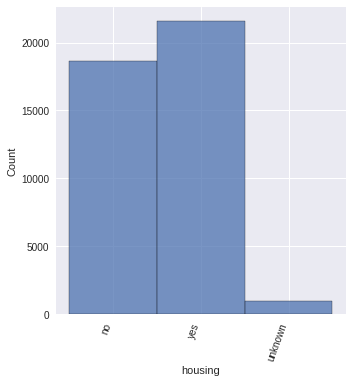

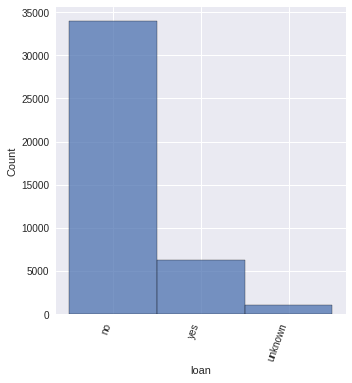

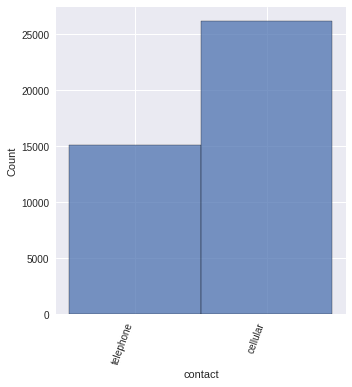

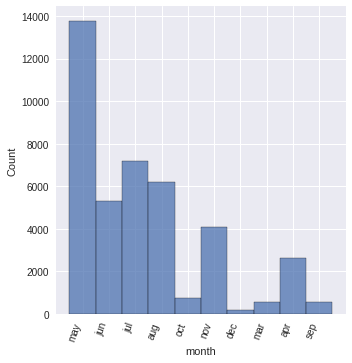

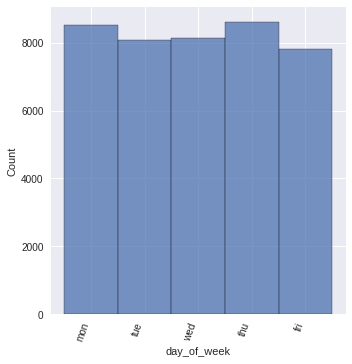

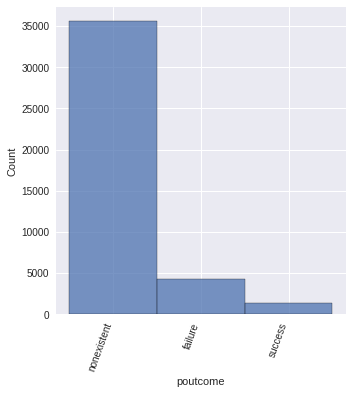

In [ ]:
for i in objList:
  sns.displot(data[i], bins=30)
  plt.xticks(rotation=70, ha = 'right')

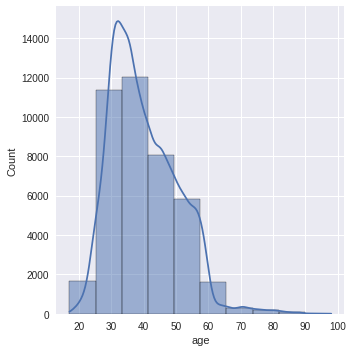

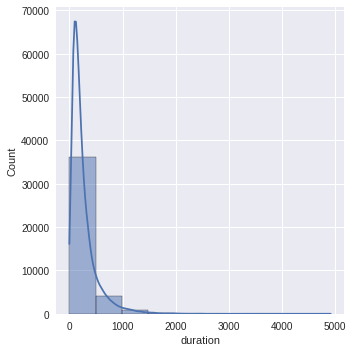

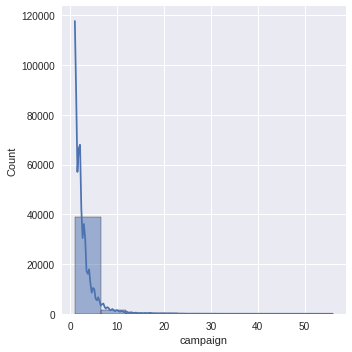

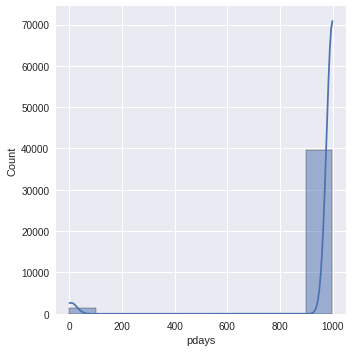

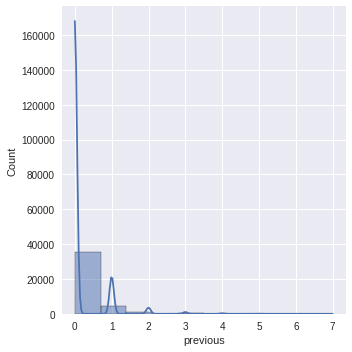

In [ ]:
for i in intList:
  sns.displot(data[i], bins=10, kde=True)

The distribution of age:

*  clients called by the bank have an extensive age range, from 17 to 98 years old
* The majority of customers called (within the 25th to 75th percentiles) is in the age of 32 to 47 years old
* The distribution of customer age is fairly normal with a small standard deviation (10.42)


The distribution of duration:

* call duration range is between 0 seconds and 4918 seconds (81 minutes)
* The distribution of call duration has a mean of 258.29 seconds (about 4 1/2 minutes) and a standard deviation 259.27 seconds 


The distribution of campaign:

* number of contacts performed during this campaign and for this client range is between 1 and 56
* The distribution has a mean of 2.6 contacts  and a standard deviation 2.8 contacts

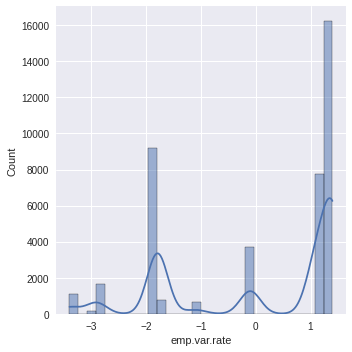

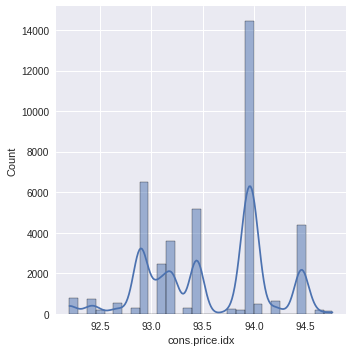

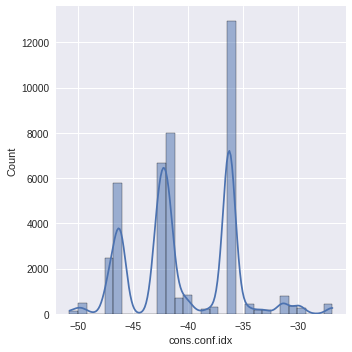

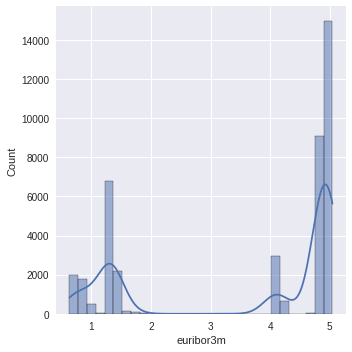

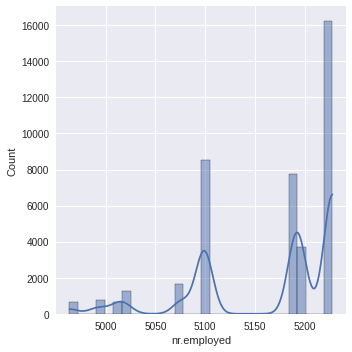

In [ ]:
for i in floatList:
  sns.displot(data[i], bins=30, kde=True)

In [ ]:
# data['nr.employed'].value_counts(normalize='True')

In [ ]:
# data['previous'].value_counts(normalize='True')

### Visualizing the outliers

Age Shape: (41188, 21)


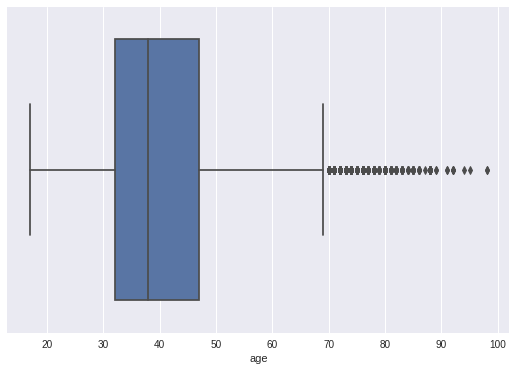

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print('Age Shape:',data.shape)

# Max and Min Quantile
max_val = data.age.quantile(0.75)
min_val = data.age.quantile(0.25)

sns.boxplot(data['age'])
plt.show()

Duration:  (41188, 21)


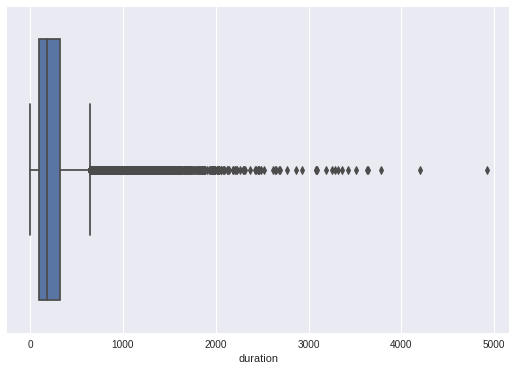

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print('Duration: ', data.shape)

# Max and Min Quantile
max_val = data.duration.quantile(0.75)
min_val = data.duration.quantile(0.25)

sns.boxplot(data['duration'])
plt.show()

Campaign:  (41188, 21)


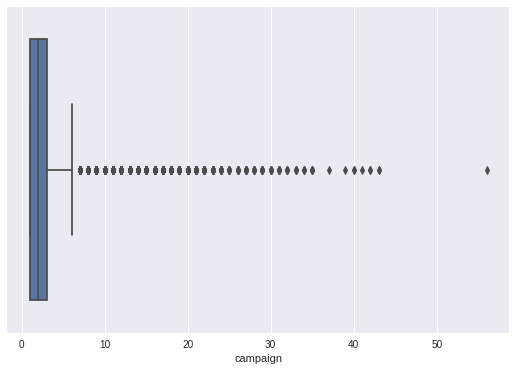

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print('Campaign: ',data.shape)
# Max and Min Quantile
max_val = data.campaign.quantile(0.75)
min_val = data.campaign.quantile(0.25)

sns.boxplot(data['campaign'])
plt.show()

Days passed from previous campaign: (1515, 21)


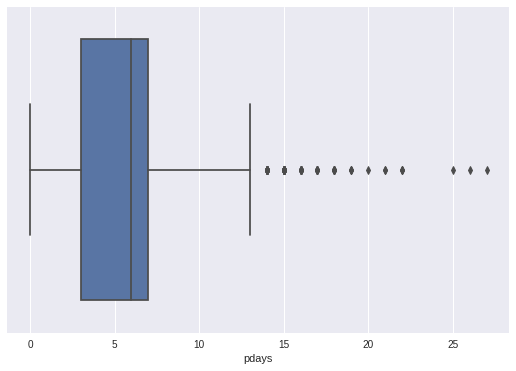

In [ ]:
# number of days that passed by after the client was last contacted from a previous campaign (numeric: 999 means client was not previously contacted)
fig, axes = plt.subplots(figsize=(9, 6))
data = data[(data['pdays']<600)]

print("Days passed from previous campaign:",data.shape)
# Max and Min Quantile
max_val = data.pdays.quantile(0.75)
min_val = data.pdays.quantile(0.25)

sns.boxplot(data['pdays'])
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

previous: (41188, 21)


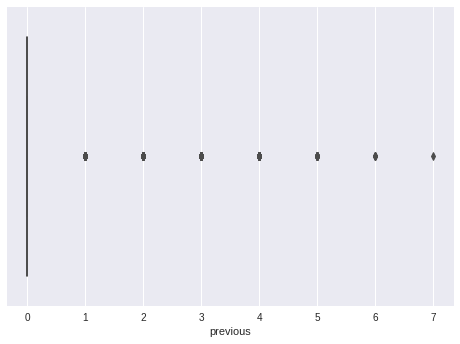

In [ ]:
# Checking the box plot for age feature
print("previous:",data.shape)
# Max and Min Quantile
max_val = data.previous.quantile(0.75)
min_val = data.previous.quantile(0.25)

sns.boxplot(data['previous'])
plt.show()

Employment variation rate - quarterly indicator: (41188, 21)


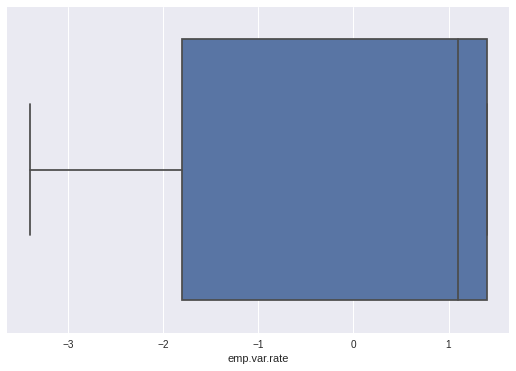

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))
emp = data['emp.var.rate']

print("Employment variation rate - quarterly indicator:",data.shape)
# Max and Min Quantile
max_val = emp.quantile(0.75)
min_val = emp.quantile(0.25)

sns.boxplot(data['emp.var.rate'])
plt.show()

Consumer confidence index — monthly indicator: (41188, 21)


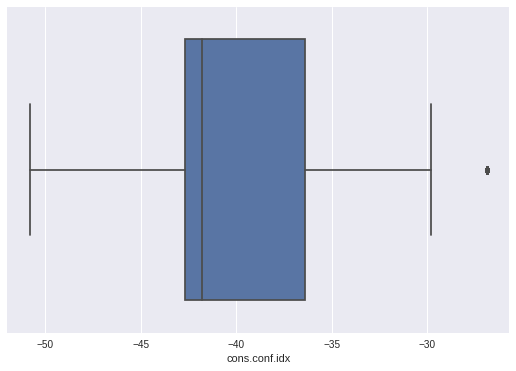

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))
confidence = data['cons.conf.idx']

print('Consumer confidence index — monthly indicator:',data.shape)

# Max and Min Quantile
max_val = confidence.quantile(0.75)
min_val = confidence.quantile(0.25)

sns.boxplot(data['cons.conf.idx'])
plt.show()

Cnsumer price index — monthly indicator: (41188, 21)


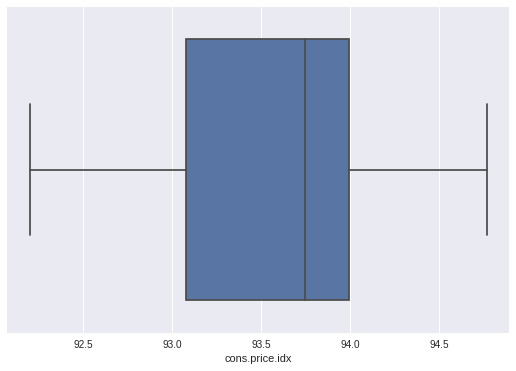

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))
price= data['cons.price.idx']

# Checking the box plot for age feature
print('Cnsumer price index — monthly indicator:',data.shape)

## Max and Min Quantile
max_val = price.quantile(0.75)
min_val = price.quantile(0.25)

sns.boxplot(data['cons.price.idx'])
plt.show()

Euribor3m: (41188, 21)


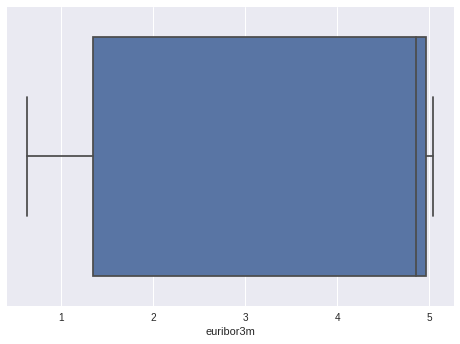

In [ ]:

print('Euribor3m:',data.shape)
## Max and Min Quantile
max_val = data.age.quantile(0.75)
min_val = data.age.quantile(0.25)

sns.boxplot(data['euribor3m'])
plt.show()

Number of employees — quarterly indicator: (41188, 21)


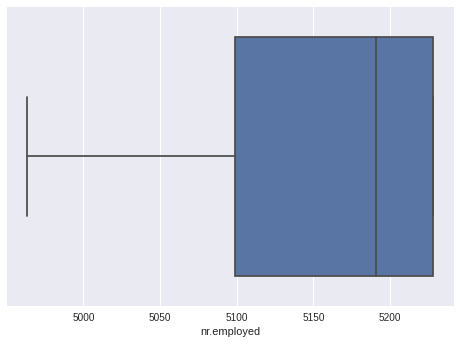

In [ ]:
employed = data['nr.employed']

print('Number of employees — quarterly indicator:',data.shape)
## Max and Min Quantile
max_val = employed.quantile(0.75)
min_val = employed.quantile(0.25)

sns.boxplot(data['nr.employed'])
plt.show()

In [ ]:
#Distribution of the Target'y' - has the client subscribed a term deposit? (binary: 'yes', 'no')

data[TARGET].value_counts(normalize='True')

no     0.887346
yes    0.112654
Name: y, dtype: float64

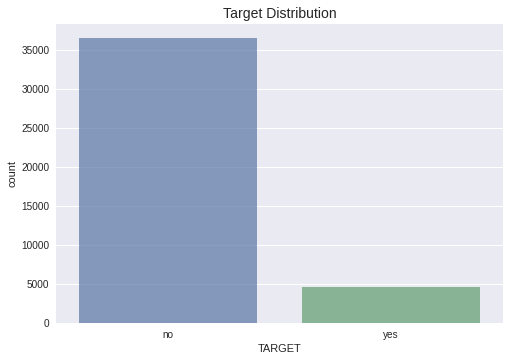

In [ ]:
sns.countplot(data[TARGET], alpha = 0.7)
plt.title("Target Distribution", fontsize=14)
plt.xlabel('TARGET')
plt.show()

In [ ]:
#replacing no and yes by 0 and 1 respectively as our target values!
data[TARGET] = data[TARGET].replace(['no','yes'],[0,1])
data[TARGET].unique()

array([0, 1])